<a href="https://colab.research.google.com/github/sangramdhurve/SVD/blob/main/SVD_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Value Decomposition(SVD) in Python

1. Loading the data set.
2. Use TruncatedSVD function in scikit learn to apply SVD for dimensionality reduction
3. Set the value of rank as a parameter for TruncatedSVD
4. Fit and transform the data set 


Loading libraries and data set

In [ ]:
import pandas as pd
from numpy import diag
import numpy as np
from sklearn import datasets
from sklearn.decomposition import TruncatedSVD

data = datasets.load_digits()
data

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
data.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

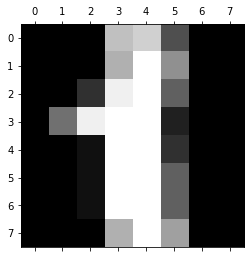

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(data.data[1].reshape(8,8))

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


**Calling TruncatedSVD function from scikit learn and fitting**

In [ ]:
svd = TruncatedSVD(n_components =1)
result= svd.fit_transform(df)
print(result)

[[ 4.58612772e+01 -1.19211574e+00  2.11000593e+01 ...  2.21412950e-01
  -2.10265062e+00  1.23162882e+00]
 [ 5.55296793e+01  7.86176977e+00 -2.04871986e+01 ... -2.10498651e+00
   1.79911678e-01  3.13061992e+00]
 [ 5.58278837e+01  6.91459576e+00 -9.66245273e+00 ...  3.06668704e-01
  -5.05587419e-01 -2.79157646e+00]
 ...
 [ 6.55269853e+01  1.06587286e+01 -6.29456080e+00 ...  3.25737631e+00
   7.02113104e-01  3.98222659e+00]
 [ 5.86061659e+01 -4.91125210e+00  1.27231523e+01 ... -2.87218588e-02
  -4.45457295e-01  4.31472038e-01]
 [ 6.44482310e+01 -4.55513470e-01  7.04184347e+00 ...  8.61015544e-01
   1.62124227e+00 -5.72667418e-01]]


In SVD the data set D  is decomposed into three matrices namely U,$\Sigma$ and V, i.e.,

$\begin{equation}
D= U \Sigma V^{T}
\end{equation}$

- The result of fit and transform functions under TruncatedSVD  is $\textbf{U $\Sigma$}$. The dot product of $\textbf{U $\Sigma$}$ gives us the new data point to be projected along vectors given by V.

- In order to find  $\Sigma$, $\textbf{singular_values_}$ under TruncatedSVD is used. 

- Matrix $\textbf{V_T}$ is obtained by using $\textbf{components_}$ function

- To obtain U, we can divide transformed data by values obtained by singular_values_

In [ ]:
sigma = svd.singular_values_
v = svd.components_
u = result/svd.singular_values_

print(sigma.shape)
print(v.shape)
print(u.shape)
print(sigma)
print(v)
print(u)

(35,)
(35, 64)
(1797, 35)
[2193.11933683  566.99677184  542.00493276  504.1516975   425.59296526
  353.21824689  320.3758358   302.07440988  279.556965    268.51944654
  228.65577207  224.16479164  207.59616167  197.01204307  185.78755437
  174.75271523  170.84809848  165.44999281  148.26909598  144.93503319
  139.33851217  131.35359637  128.81123418  124.95643909  122.62687851
  113.6417394   111.49197231  105.78046222  102.87833133   96.23506883
   89.8288207    87.47701864   85.28588146   84.15579589   81.74307224]
[[ 2.22044605e-16  5.77192878e-03  1.00696020e-01 ...  1.30885120e-01
   3.92343661e-02  6.76004954e-03]
 [ 4.48273129e-17 -1.73619371e-02 -2.24200800e-01 ... -9.01286131e-02
  -3.68410903e-02 -1.15150706e-02]
 [-7.43680667e-17 -9.85740003e-03 -4.48071690e-02 ...  1.83210572e-01
   2.14953332e-02 -6.40453868e-03]
 ...
 [ 1.37266497e-16 -4.02031261e-02 -9.51111547e-02 ... -1.66282649e-01
   1.86073286e-01  1.99005457e-01]
 [-7.73395136e-17 -2.81279083e-02  6.21756766e-02 .

**Testing if the dot product of U, Σ and V gives the original data set**

In [ ]:
s= diag(svd.singular_values_)
new_data = np.dot(result, v)
new_data = np.round(new_data,2)
print(new_data)
print(df.values)

[[ 0.    0.05  5.45 ...  0.2  -0.99 -0.12]
 [ 0.   -0.27  0.51 ...  8.65  0.96  0.51]
 [ 0.    0.36 -0.1  ... 15.13  8.74  1.19]
 ...
 [ 0.   -0.28  1.58 ...  6.4  -0.38 -0.32]
 [ 0.   -0.15  3.96 ... 11.46  0.75  0.34]
 [ 0.    0.79  9.03 ... 12.07  1.49 -0.92]]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [ ]:
data_diff = np.subtract(df, new_data)
data_squarediff = np.square(data_diff)
print('Frobenius Norm = ', np.sqrt(data_squarediff.sum()))



Frobenius Norm =  pixel_0_0     0.000000
pixel_0_1    26.770491
pixel_0_2    37.066328
pixel_0_3    48.065034
pixel_0_4    19.525798
               ...    
pixel_7_3    45.166596
pixel_7_4    27.470661
pixel_7_5    37.377453
pixel_7_6    29.728636
pixel_7_7    45.385365
Length: 64, dtype: float64


<Figure size 432x288 with 0 Axes>

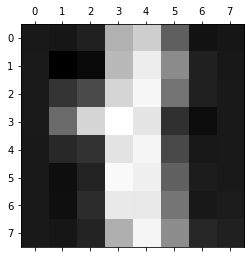

In [ ]:
plt.gray()
plt.matshow(new_data[1].reshape(8,8))